In [377]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import streamlit as st
import plotly.express as px

## Yahoo Finance Data Retrieval

In [399]:
df = yf.download('SPY', interval='1m', period='1d')

df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Datetime,,,,,
2025-03-31 13:30:00+00:00,550.12,550.63,549.78,549.83,2676516
2025-03-31 13:31:00+00:00,549.97,550.21,549.81,550.13,258120
2025-03-31 13:32:00+00:00,549.43,549.99,549.34,549.96,273385
2025-03-31 13:33:00+00:00,548.87,549.42,548.84,549.40,395314
2025-03-31 13:34:00+00:00,548.69,548.95,548.33,548.89,327907
...,...,...,...,...,...
2025-03-31 19:55:00+00:00,559.42,559.43,558.44,559.38,1065462
2025-03-31 19:56:00+00:00,559.13,559.51,559.10,559.41,722191


In [382]:
df = df[['Open','High','Low','Close','Volume']]
df.tail()

Price,Open,High,Low,Close,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Datetime,,,,,
2025-03-31 19:18:00+00:00,558.40,558.60,558.38,558.47,168662
2025-03-31 19:19:00+00:00,558.47,558.47,558.09,558.36,255842
2025-03-31 19:20:00+00:00,558.40,558.59,558.34,558.57,179209
2025-03-31 19:21:00+00:00,558.57,558.92,558.39,558.77,212977
2025-03-31 19:22:00+00:00,558.95,558.95,558.95,558.95,0


### Strategy 1: Moving Averages

In [163]:
# Step 1: Create moving averages
df['MA_3'] = df['Close'].rolling(window=3).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Step 2: Create buy/sell signals
df['Signal'] = 0
df.loc[df['MA_3'] > df['MA_10'], 'Signal'] = 1
df.loc[df['MA_3'] < df['MA_10'], 'Signal'] = -1

# Optional: filter just when the signal changes
df['Signal_Change'] = df['Signal'].diff()

# Step 3: Preview signal logic
df[['Close', 'MA_3', 'MA_10', 'Signal', 'Signal_Change']].tail(20)

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/2749630758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_3'] = df['Close'].rolling(window=3).mean()
/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/2749630758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_10'] = df['Close'].rolling(window=10).mean()
/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/2749630758.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

Price,Close,MA_3,MA_10,Signal,Signal_Change
Ticker,SPY,,,,
Datetime,,,,,
2025-03-31 16:51:00+00:00,554.180115,554.048340,554.029095,1,2.0
2025-03-31 16:52:00+00:00,554.090027,554.063354,554.024097,1,0.0
2025-03-31 16:53:00+00:00,554.150024,554.140055,554.035101,1,0.0
2025-03-31 16:54:00+00:00,554.359985,554.200012,554.078101,1,0.0
2025-03-31 16:55:00+00:00,554.049927,554.186646,554.054095,1,0.0
2025-03-31 16:56:00+00:00,553.650024,554.019979,554.035095,-1,-2.0
2025-03-31 16:57:00+00:00,553.380005,553.693319,553.973993,-1,0.0
2025-03-31 16:58:00+00:00,553.229980,553.420003,553.905499,-1,0.0


In [165]:
# Step 1: Initialize strategy variables
initial_cash = 10000
cash = initial_cash
position = 0
portfolio = []

# Step 2: Simulate the trades
for i in range(len(df)):
    price = df['Close'].iloc[i]
    signal = df['Signal_Change'].iloc[i]

    # BUY signal
    if signal == 1 and cash > 0:
        position = cash / price
        cash = 0

    # SELL signal
    elif signal == -1 and position > 0:
        cash = position * price
        position = 0

    # Calculate current portfolio value
    portfolio_value = cash + position * price
    portfolio.append(portfolio_value)

# Step 3: Add portfolio value to DataFrame
df['Portfolio_Value'] = portfolio

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/261413117.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Portfolio_Value'] = portfolio


In [167]:
# Ensure index is datetime
df.index = pd.to_datetime(df.index)

# Filter to trading hours
df_filtered = df.between_time("09:30", "16:00")

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/1326297650.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  f"${float(row['Close']):.2f}",
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)
/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/1326297650.py:66: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price = float(row['Close'])
/

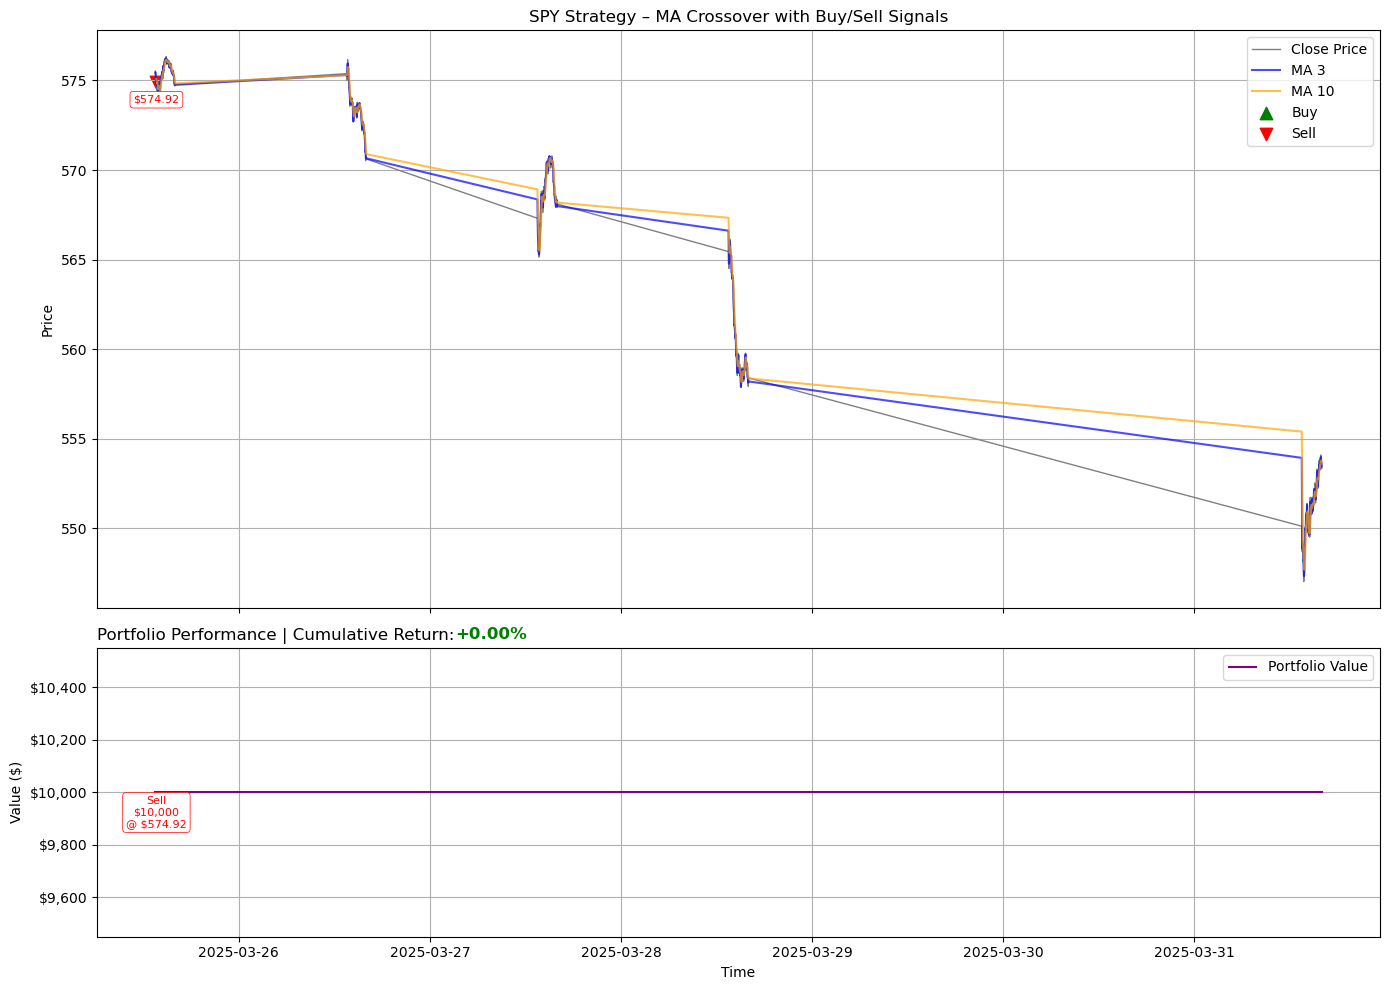

In [168]:
# Set up the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# --- Price + MAs + Buy/Sell Signals ---
ax1.plot(df_filtered.index, df_filtered['Close'], label='Close Price', color='gray', linewidth=1)
ax1.plot(df_filtered.index, df_filtered['MA_3'], label='MA 3', color='blue', alpha=0.7)
ax1.plot(df_filtered.index, df_filtered['MA_10'], label='MA 10', color='orange', alpha=0.7)

buy_signals = df_filtered[df_filtered['Signal_Change'] == 1]
sell_signals = df_filtered[df_filtered['Signal_Change'] == -1]

# Buy markers and annotations
ax1.scatter(buy_signals.index, buy_signals['Close'], label='Buy', marker='^', color='green', s=80)
for idx, row in buy_signals.iterrows():
    ax1.annotate(
        f"${float(row['Close']):.2f}",
        (idx, row['Close']),
        textcoords="offset points",
        xytext=(0, 12),
        ha='center',
        fontsize=8,
        color='green',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=0.5)
    )

# Sell markers and annotations
ax1.scatter(sell_signals.index, sell_signals['Close'], label='Sell', marker='v', color='red', s=80)
for idx, row in sell_signals.iterrows():
    ax1.annotate(
        f"${float(row['Close']):.2f}",
        (idx, row['Close']),
        textcoords="offset points",
        xytext=(0, -15),
        ha='center',
        fontsize=8,
        color='red',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.5)
    )

ax1.set_title('SPY Strategy – MA Crossover with Buy/Sell Signals')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# --- Portfolio Value Plot ---
ax2.plot(df_filtered.index, df_filtered['Portfolio_Value'], label='Portfolio Value', color='purple')

# Annotate BUY signals
for idx, row in buy_signals.iterrows():
    price = float(row['Close'])
    value = float(row['Portfolio_Value'])

    ax2.annotate(
        f"Buy\n${value:,.0f}\n@ ${price:.2f}",
        (idx, value),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='green',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", lw=0.5)
    )

# Annotate SELL signals
for idx, row in sell_signals.iterrows():
    price = float(row['Close'])
    value = float(row['Portfolio_Value'])

    ax2.annotate(
        f"Sell\n${value:,.0f}\n@ ${price:.2f}",
        (idx, value),
        textcoords="offset points",
        xytext=(0, -25),
        ha='center',
        fontsize=8,
        color='red',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.5)
    )


# Calculate cumulative return
start_value = df_filtered['Portfolio_Value'].iloc[0]
end_value = df_filtered['Portfolio_Value'].iloc[-1]
cumulative_return = float((end_value - start_value) / start_value * 100)
formatted_return = f"{float(cumulative_return):+.2f}%"

# Set the base title (neutral color)
ax2.set_title("Portfolio Performance | Cumulative Return:", loc='left', color='black')

# Add the colored return value next to it
ax2.text(
    x=0.335, y=1.02, s=formatted_return,
    transform=ax2.transAxes,
    ha='right', va='bottom',
    fontsize=12,
    color='green' if cumulative_return >= 0 else 'red',
    fontweight='bold'
)
ax2.set_ylabel('Value ($)')
ax2.set_xlabel('Time')
ax2.grid(True)
ax2.legend()

# Apply comma formatting to y-axis (portfolio value)
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


### Strategy 2: Proportional Investing by the minute


- Scaling in when the price drops

- Lowering cost basis

- Selling incrementally when price rises

- Buying more proportionally when price drops

- Selling a fraction of holdings when price rises

- Grows the portfolio value and logs realized gains on each sell

📈 Cumulative Return: -1.01%


,Time,Action,Shares,Price,Cash,Portfolio Value,P&L
0,2025-03-25 13:50:00+00:00,Buy,4.35,574.28,"7,500.00","10,000.00",0.00
1,2025-03-25 13:51:00+00:00,Buy,0.00,574.19,"7,499.71","9,999.61",0.00
2,2025-03-25 14:02:00+00:00,Buy,0.00,574.11,"7,499.44","9,999.26",0.00
3,2025-03-25 14:07:00+00:00,Sell,1.61,574.81,"8,424.35","10,002.31",0.85
4,2025-03-25 14:10:00+00:00,Sell,1.53,575.09,"9,305.53","10,003.08",1.24
...,...,...,...,...,...,...,...
299,2025-03-31 15:51:00+00:00,Sell,0.00,553.91,"9,897.88","9,897.88",0.00
300,2025-03-31 15:52:00+00:00,Sell,0.00,553.93,"9,897.88","9,897.88",0.00
301,2025-03-31 15:53:00+00:00,Sell,0.00,554.10,"9,897.88","9,897.88",0.00
302,2025-03-31 15:54:00+00:00,Sell,0.00,553.92,"9,897.88","9,897.88",0.00


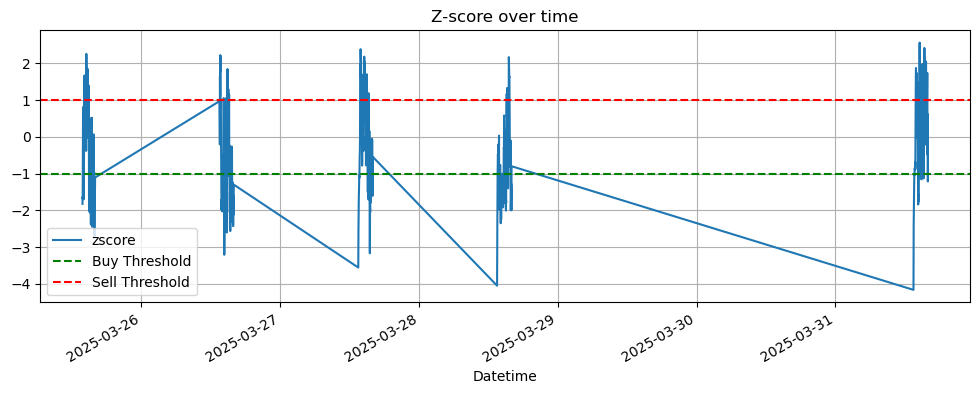

In [384]:
# 1. Drop multi-level columns first
df.columns = df.columns.get_level_values(0)
df['Close'] = df['Close'].astype(float)

# 2. Ensure datetime index and timezone
df.index = pd.to_datetime(df.index)
df = df.sort_index()
if df.index.tz is None:
    df.index = df.index.tz_localize("UTC").tz_convert("America/New_York")

# 3. Filter trading hours and weekdays
df = df.between_time("09:30", "16:00")
df = df[df.index.dayofweek < 5]

# 4. Z-score calculation
window = 20
df['zscore'] = (df['Close'] - df['Close'].rolling(window).mean()) / df['Close'].rolling(window).std()

# --- Strategy parameters ---
initial_investment = 10000
backup_cash = 10000
threshold_return = 0.5
shares = 0
portfolio_values = []
trades = []

MAX_POSITION_RATIO = 0.25
MIN_CASH_BUFFER = 2000
Z_BUY = -1
Z_SELL = 1

starting_capital = initial_investment + backup_cash
has_liquidated = False

# --- Main loop ---
for i in range(window, len(df)):
    price = float(df['Close'].iloc[i])
    z = df['zscore'].iloc[i]
    timestamp = df.index[i]

    equity_value = shares * price
    portfolio_value = backup_cash + equity_value
    portfolio_values.append(portfolio_value)

    if has_liquidated:
        break

    # Liquidation condition
    if not has_liquidated and (portfolio_value - starting_capital) / starting_capital >= threshold_return:
        backup_cash += equity_value
        trades.append({
            'Time': timestamp, 'Action': 'Liquidate',
            'Shares': shares, 'Price': price, 'Value': equity_value,
            'Cash': backup_cash, 'Portfolio Value': portfolio_value
        })
        shares = 0
        has_liquidated = True
        continue

    # Position control
    max_allowed_position = portfolio_value * MAX_POSITION_RATIO

    # Buy logic
    if z < Z_BUY:
        drop_pct = abs(z) / 3
        investment = min(backup_cash, backup_cash * drop_pct)
        available_room = max_allowed_position - equity_value
        investment = min(investment, available_room)

        if backup_cash - investment >= MIN_CASH_BUFFER and investment > 0:
            bought_shares = investment / price
            shares += bought_shares
            backup_cash -= investment
            trades.append({
                'Time': timestamp, 'Action': 'Buy', 'Shares': bought_shares,
                'Price': price, 'Value': investment,
                'Cash': backup_cash, 'Portfolio Value': portfolio_value
            })

    # Sell logic
    elif z > Z_SELL and shares > 0:
        climb_pct = z / 3
        sell_shares = min(shares, shares * climb_pct)
        if sell_shares > 0:
            proceeds = sell_shares * price
            backup_cash += proceeds
            shares -= sell_shares
            trades.append({
                'Time': timestamp, 'Action': 'Sell', 'Shares': sell_shares,
                'Price': price, 'Value': proceeds,
                'Cash': backup_cash, 'Portfolio Value': portfolio_value
            })

# Fill rest of portfolio values
for _ in range(window):
    portfolio_values.insert(0, np.nan)

df['Portfolio_Value'] = portfolio_values

# --- Cumulative Return ---
start_value = df['Portfolio_Value'].dropna().iloc[0]
end_value = df['Portfolio_Value'].dropna().iloc[-1]
cumulative_return = float((end_value - start_value) / start_value * 100)
formatted_return = f"{cumulative_return:+.2f}%"

# --- Build Trade Log with P&L ---
trades_df = pd.DataFrame(trades)

avg_cost = 0
total_shares = 0
realized_pnl = []

for idx, row in trades_df.iterrows():
    action = row['Action']
    shares_traded = row['Shares']
    price = row['Price']
    value = row['Value']

    if action == 'Buy':
        total_cost = avg_cost * total_shares
        total_shares += shares_traded
        total_cost += value
        avg_cost = total_cost / total_shares if total_shares else 0
        realized_pnl.append(0)

    elif action in ['Sell', 'Liquidate']:
        pnl = (price - avg_cost) * shares_traded
        total_shares -= shares_traded
        realized_pnl.append(pnl)

trades_df['P&L'] = realized_pnl

# --- Display Results ---
print(f"📈 Cumulative Return: {formatted_return}")
if trades_df.empty:
    print("⚠️ No trades were executed.")
else:
    display(trades_df[['Time', 'Action', 'Shares', 'Price', 'Cash', 'Portfolio Value', 'P&L']])

# --- Plot Z-score ---
df['zscore'].plot(figsize=(12,4), title="Z-score over time")
plt.axhline(Z_BUY, color='green', linestyle='--', label='Buy Threshold')
plt.axhline(Z_SELL, color='red', linestyle='--', label='Sell Threshold')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/3485604409.py:11: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax1.plot_date(df.index, df['Close'], '-', label='Close Price', color='gray', linewidth=1, markersize=0)
/var/folders/pv/mkxvrtmj3p531hhmkxtn40tw0000gn/T/ipykernel_59182/3485604409.py:23: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax2.plot_date(df.index, df['Portfolio_Value'], '-', label='Portfolio Value', color='purple', linewidth=1, markersize=0)


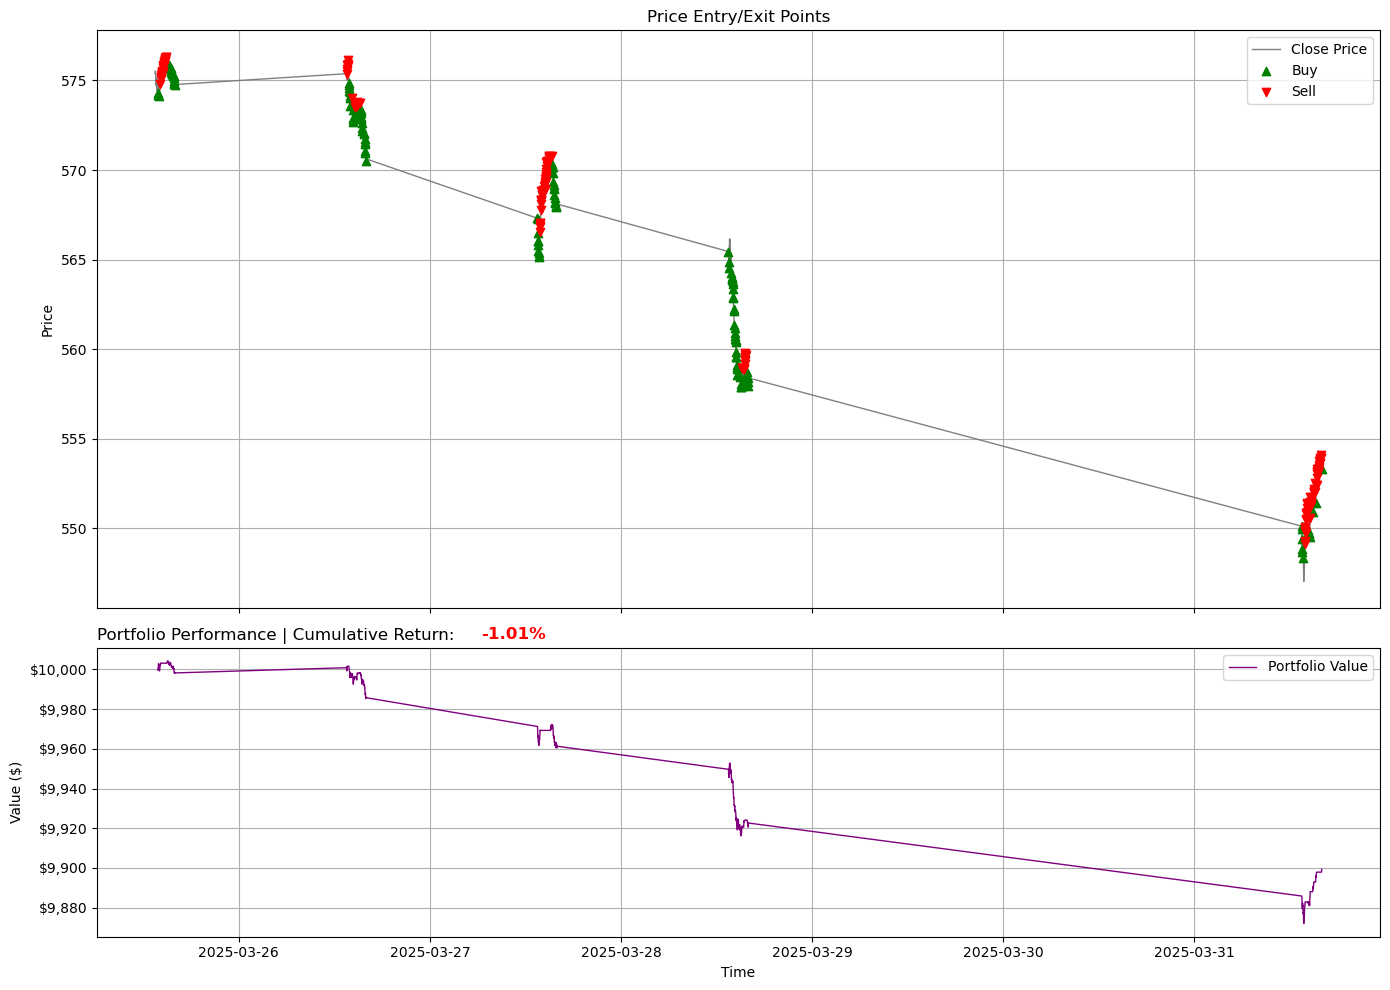

In [386]:
if not trades_df.empty:
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # --- Price Chart with Entry/Exit ---
    ax1.set_title("Price Entry/Exit Points")
    ax1.set_ylabel("Price")
    ax1.grid(True)

    # Plot price line with no weekend/overnight interpolation
    ax1.plot_date(df.index, df['Close'], '-', label='Close Price', color='gray', linewidth=1, markersize=0)

    # Mark buy/sell points
    buy_trades = trades_df[trades_df['Action'] == 'Buy']
    sell_trades = trades_df[trades_df['Action'] == 'Sell']

    ax1.scatter(buy_trades['Time'], buy_trades['Price'], marker='^', color='green', label='Buy', zorder=5)
    ax1.scatter(sell_trades['Time'], sell_trades['Price'], marker='v', color='red', label='Sell', zorder=5)

    ax1.legend()

    # --- Portfolio Performance Chart ---
    ax2.plot_date(df.index, df['Portfolio_Value'], '-', label='Portfolio Value', color='purple', linewidth=1, markersize=0)
    ax2.set_title("Portfolio Performance | Cumulative Return:", loc='left')
    ax2.text(
        x=0.35, y=1.02, s=formatted_return,
        transform=ax2.transAxes,
        ha='right', va='bottom',
        fontsize=12,
        color='green' if cumulative_return >= 0 else 'red',
        fontweight='bold'
    )
    ax2.set_ylabel("Value ($)")
    ax2.set_xlabel("Time")
    ax2.grid(True)
    ax2.legend()
    ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No trades were executed, so there's nothing to plot.")
